<a href="https://colab.research.google.com/github/poporubeus/Chess_network/blob/main/COMMUNITY_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
def clean_dataframe(dataframe): #questa funzione pulisce il df eliminando le colonne inutili e droppa i NaN
  df = pd.read_csv(dataframe)
  new_df = pd.DataFrame(df, columns=['White', 'Black', 'Result', 'Date', 'Opening'])
  new_df = new_df.dropna()
  return new_df

In [11]:
path18 = '/content/data_2018.csv'
df2018 = clean_dataframe(path18)
df2018

White             Black Result          Date  \
0                 Smirnov, A         Petrov, D    1-0  Jul 06, 2018   
1                 Lumiste, R       Chukavin, K    ½-½  Jul 06, 2018   
2                    Soot, M        Smirnov, A    1-0  Jul 06, 2018   
3                  Sirosh, I       Dubrovin, R    0-1  Jul 06, 2018   
4                Shvyrjov, I          Kanep, M    0-1  Jul 06, 2018   
...                      ...               ...    ...           ...   
20815             Pulvett, D            Pap, M    1-0  Jan 07, 2018   
20816         Lopez Mulet, I          Korpa, B    0-1  Jan 07, 2018   
20817                 Liu, G  Garcia Sancho, J    1-0  Jan 07, 2018   
20818              Bjerre, J         Anurag, M    0-1  Jan 07, 2018   
20819  Espineira Gonzalez, D      Wieczorek, O    ½-½  Jan 07, 2018   

                                                 Opening  
0                D15 Queen's Gambit Declined Slav, 4.Nc3  
1                                       A05 Reti opening  
2                                   B32 Sicilian defence  
3      E69 King's Indian, fianchetto, classical main ...  
4                                  A46 Queen's pawn game  
...                                                  ...  
20815                 A37 English, symmetrical variation  
20816                              E00 Queen's pawn game  
20817                               B23 Sicilian, closed  
20818                                   C53 Giuoco Piano  
20819               B80 Sicilian, Scheveningen variation  

[19372 rows x 5 columns]

In [4]:
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.7 MB/s eta 0:00:00


In [5]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.0 MB/s eta 0:00:00


In [5]:
import igraph as ig

In [6]:
G=nx.from_pandas_edgelist(df2018, 'White', 'Black', create_using=nx.DiGraph())

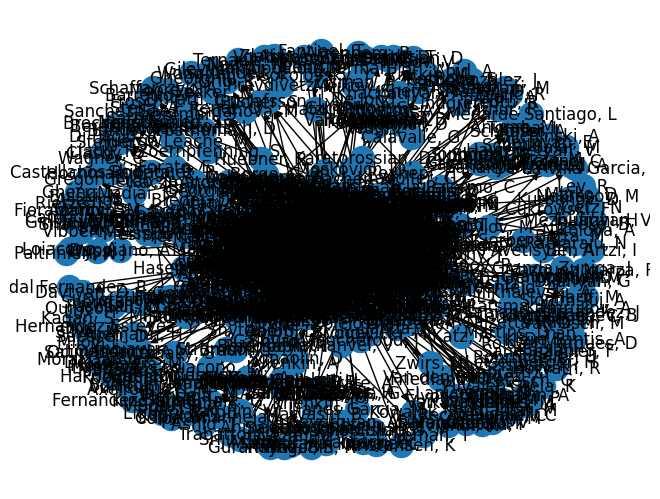

In [7]:
fig = nx.draw(G, with_labels = True)
plt.axis('off')

plt.show()

In [12]:
len(G.edges)

18573

In [13]:
df2018 = df2018.dropna()
df2018

White             Black Result          Date  \
0                 Smirnov, A         Petrov, D    1-0  Jul 06, 2018   
1                 Lumiste, R       Chukavin, K    ½-½  Jul 06, 2018   
2                    Soot, M        Smirnov, A    1-0  Jul 06, 2018   
3                  Sirosh, I       Dubrovin, R    0-1  Jul 06, 2018   
4                Shvyrjov, I          Kanep, M    0-1  Jul 06, 2018   
...                      ...               ...    ...           ...   
20815             Pulvett, D            Pap, M    1-0  Jan 07, 2018   
20816         Lopez Mulet, I          Korpa, B    0-1  Jan 07, 2018   
20817                 Liu, G  Garcia Sancho, J    1-0  Jan 07, 2018   
20818              Bjerre, J         Anurag, M    0-1  Jan 07, 2018   
20819  Espineira Gonzalez, D      Wieczorek, O    ½-½  Jan 07, 2018   

                                                 Opening  
0                D15 Queen's Gambit Declined Slav, 4.Nc3  
1                                       A05 Reti opening  
2                                   B32 Sicilian defence  
3      E69 King's Indian, fianchetto, classical main ...  
4                                  A46 Queen's pawn game  
...                                                  ...  
20815                 A37 English, symmetrical variation  
20816                              E00 Queen's pawn game  
20817                               B23 Sicilian, closed  
20818                                   C53 Giuoco Piano  
20819               B80 Sicilian, Scheveningen variation  

[19372 rows x 5 columns]

In [14]:
node_names = G.nodes

<ipython-input-15-99d8df295569>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pos[:,0], pos[:,1],  s=4,alpha=.4,edgecolor='black',linewidth=.1,cmap='tab20')


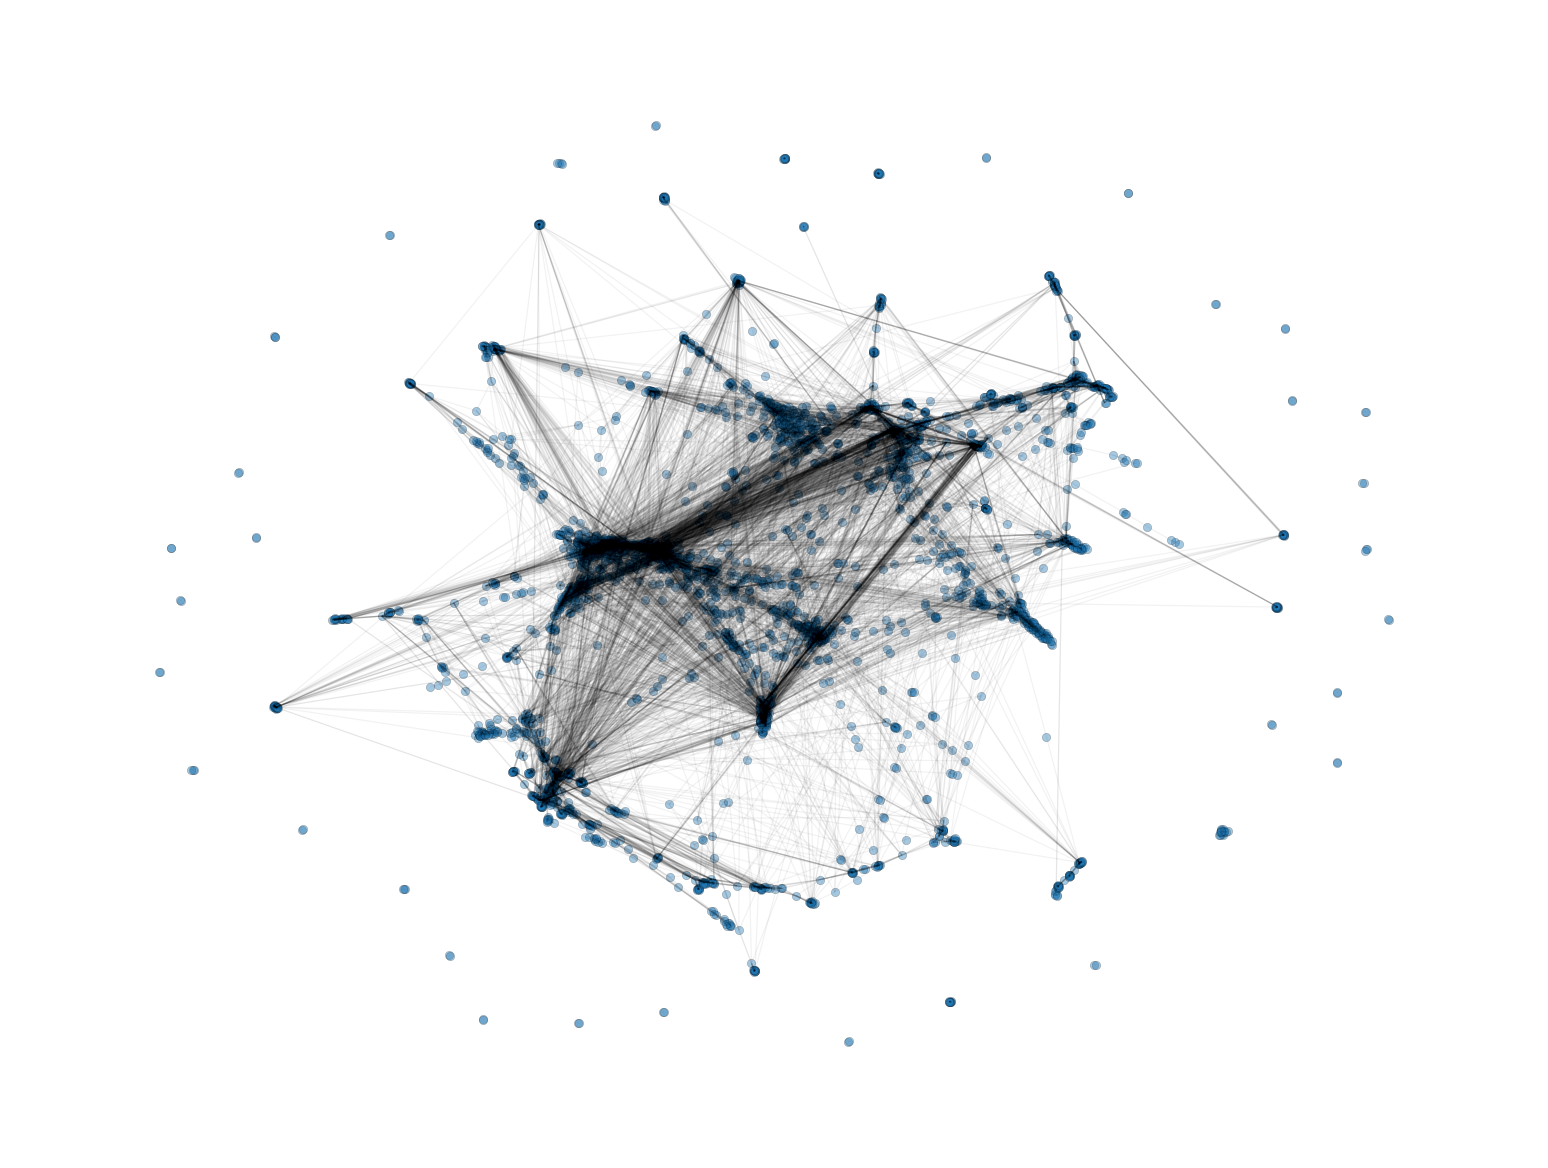

In [15]:
# Create a networkx graph from edges

G=nx.from_pandas_edgelist(df2018, 'White', 'Black', create_using=nx.DiGraph())

#print(nx.info(G))

# Convert to igraph

G_ig = ig.Graph.TupleList(G.edges(), directed=True)

# Compute layout with drl of igraph

layt = G_ig.layout_drl()

 # Convert layt to a dictionary with key:vertex name and value:position

positions = {}

for i, vertex in enumerate(G_ig.vs):

    positions[vertex["name"]] = layt[i]

pos= np.array(list(positions.values()))

plt.figure(dpi=300)

# Draw the nodes with scatter

plt.scatter(pos[:,0], pos[:,1],  s=4,alpha=.4,edgecolor='black',linewidth=.1,cmap='tab20')

#for i, txt in enumerate(node_names):
 #   plt.annotate(txt, (pos[i, 0], pos[i, 1]), fontsize=3, alpha=0.8). PER I NOMI


# Draw a random sampling of edges

edges = np.array(G.edges())

edges = edges[np.random.choice(edges.shape[0], len(G.edges), replace=False), :]


# Draw the edges with networkx draw_networkx_edges

nx.draw_networkx_edges(G, positions, edgelist=edges, alpha=0.05, arrows=False, width=0.3)

plt.axis('off')

plt.show()

In [195]:
#partition_leiden = leiden.find_partition(G_ig, leiden.ModularityVertexPartition)

In [196]:
#partition_leiden

In [37]:
#ig.plot(partition)

AttributeError: ignored

In [71]:
import community

In [16]:
nx.community.louvain_communities(G, seed=123)

[{'Dubrovin, R',
  'Krupenski, J',
  'Kukk, S',
  'Petrov, D',
  'Sepp, O',
  'Shvyrjov, I',
  'Smirnov, A',
  'Soot, M'},
 {'Fuchs, J',
  'Kuberczyk, C',
  'Lubbe, M',
  'Polster, C',
  'Pubantz, J',
  'Sriram, J',
  'Wenzel, B'},
 {'Barath M,',
  'Drozdowski, K',
  'Ewert, H',
  'Ikeda, J',
  'Karpatchev, A',
  'Lubbe, N',
  'Malakhatko, V',
  'Sinz, B',
  'Vorobiov, E',
  'Winterberg, L'},
 {'Acor, C', 'Miladinovic, L', 'Tanenbaum, Z'},
 {'Andrews, T', 'Turgut, A', 'Virkud, A'},
 {'Homa, S', 'Meyer, E', 'Puckett, M'},
 {'Aaron, D', 'Cooke, E', 'Oberoi, S'},
 {'Indusekar, A', 'Li, J', 'Mahajan, R', 'Obili, A'},
 {'Flaquer, L', 'Idnani, R', 'Mishra, A', 'Polgar Shutzman, T'},
 {'Akobian, V',
  'Anton Guijarro, D',
  'Bacallao Alonso, Y',
  'Baryshpolets, A',
  'Bok, B',
  'Bruzon Batista, L',
  'Checa, N',
  'Dreev, A',
  'Durarbayli, V',
  'Edouard, R',
  'Fridman, D',
  'Ganguly, S',
  'Indjic, A',
  'Ipatov, A',
  'Izoria, Z',
  'Jumabayev, R',
  'Lagunow, A',
  'Lenderman, A',
  '

In [17]:
G=nx.from_pandas_edgelist(df2018, 'White', 'Black')

<ipython-input-18-0628961bf04a>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", num_communities)


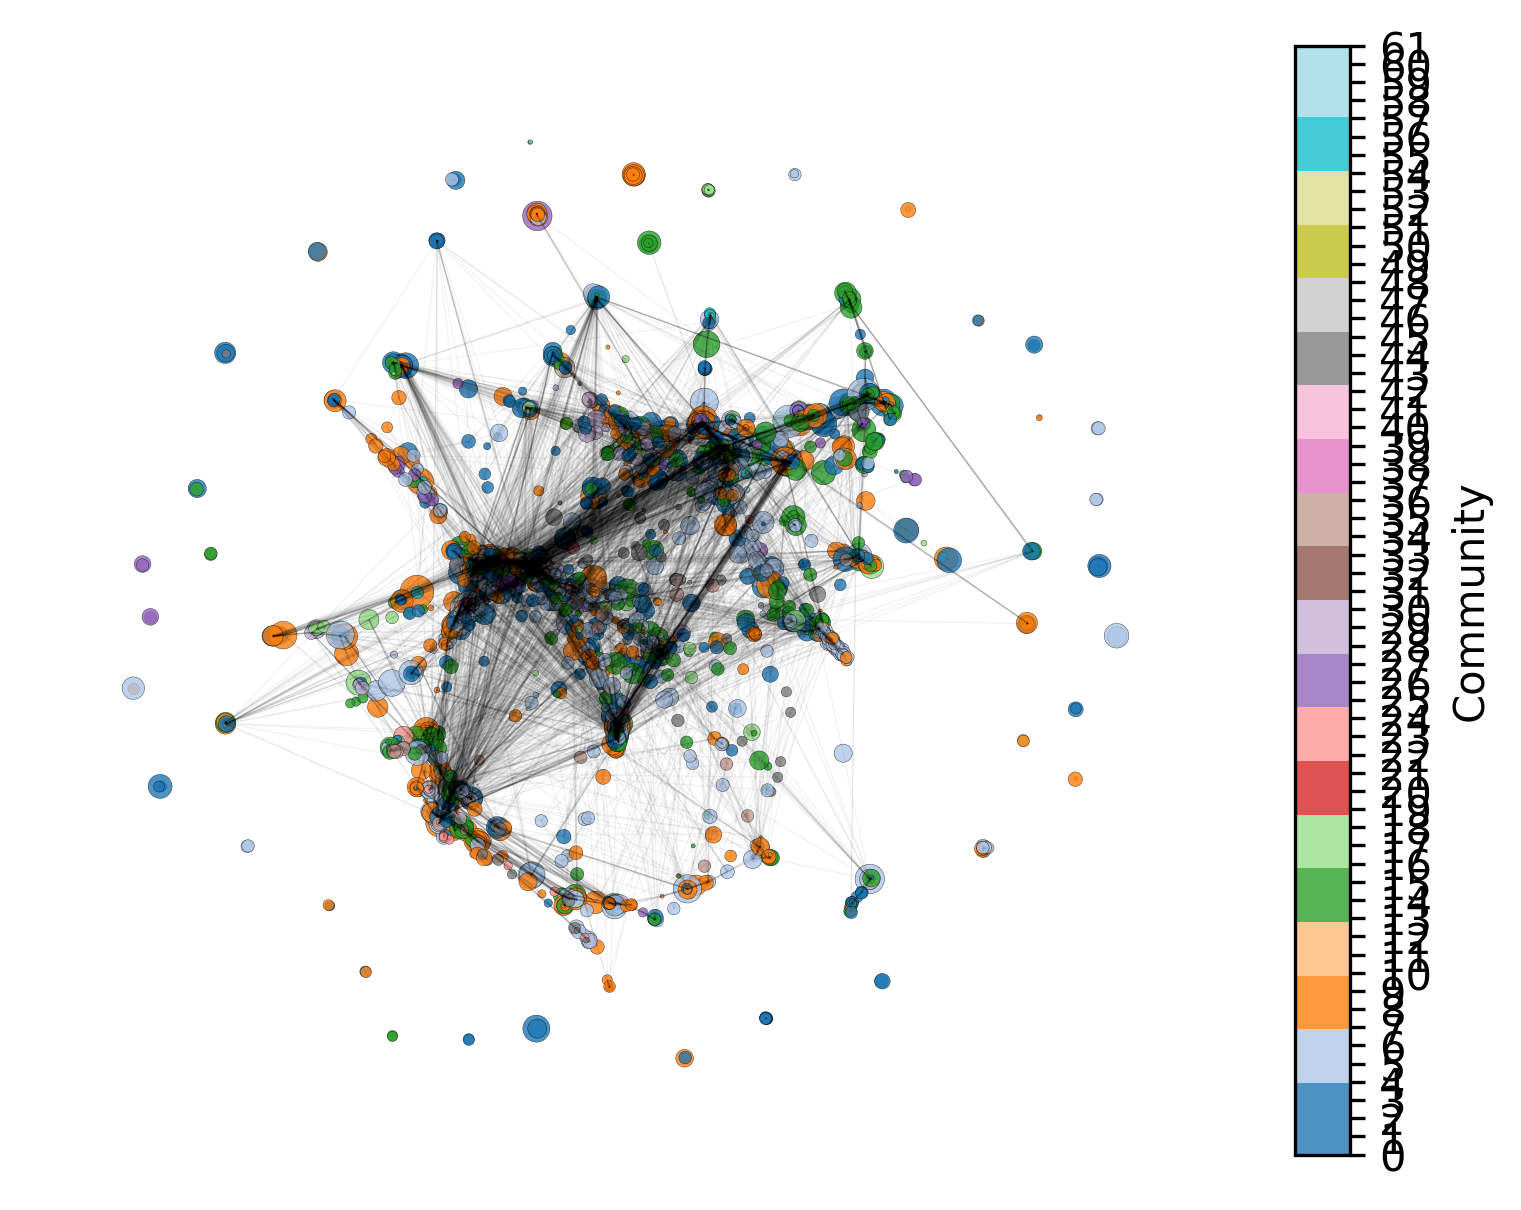

In [18]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

partition = community_louvain.best_partition(G, random_state=42)

# Convert the partition to a dictionary with key: node name and value: community label
community_labels = {node: community_id for node, community_id in partition.items()}

# Generate a color map for communities
num_communities = max(community_labels.values()) + 1
cmap = plt.cm.get_cmap("tab20", num_communities)

plt.figure(dpi=300)

# Draw the nodes with scatter and color them based on communities
scatter = plt.scatter(pos[:, 0], pos[:, 1], c=list(community_labels.values()), s=[G.degree(node) for node in G.nodes], alpha=.8, edgecolor='black', linewidth=.1, cmap=cmap)

# Draw the edges with networkx draw_networkx_edges
nx.draw_networkx_edges(G, positions, edgelist=edges, alpha=0.05, arrows=False, width=0.3)

# Add color bar for communities
cbar = plt.colorbar(scatter, ticks=np.arange(num_communities))
cbar.set_label('Community')

plt.axis('off')
plt.show()


In [19]:
list_of_comm = []
for key in partition.keys():
  list_of_comm.append(partition[key])

In [20]:
len(set(list_of_comm))

62

In [21]:
path00 = '/content/df_2000.csv'
df2000 = clean_dataframe(path00)
df2000

<ipython-input-10-0699534ad467>:2: DtypeWarning: Columns (6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataframe)


White            Black Result          Date  \
0       Cots Paltor, J    Loubatiere, J    0-1  Jun 10, 2000   
1          Diakonov, M  Rechi Montes, X    1-0  Jun 10, 2000   
2           Erlantz, M      Guennoun, A    1-0  Jun 10, 2000   
3             Flear, C       Simonet, M    ½-½  Jun 10, 2000   
4       Garcia Boix, R       Touzane, O    1-0  Jun 10, 2000   
...                ...              ...    ...           ...   
139295        Senff, M        Ivacic, V    1-0  Feb 09, 2000   
139296     Skoberne, J  Belardinelli, F    1-0  Feb 09, 2000   
139297     Srebrnic, A        Cioara, A    ½-½  Feb 09, 2000   
139298      Stantic, S      Portelli, S    1-0  Feb 09, 2000   
139299       Vivoda, S         Tinta, M    ½-½  Feb 09, 2000   

                                               Opening  
0                     B82 Sicilian, Scheveningen, 6.f4  
1              B22 Sicilian, Alapin's variation (2.c3)  
2                                   A02 Bird's opening  
3                   A30 English, symmetrical variation  
4       E63 King's Indian, fianchetto, Panno variation  
...                                                ...  
139295                           B12 Caro-Kann defence  
139296         B22 Sicilian, Alapin's variation (2.c3)  
139297              A30 English, symmetrical variation  
139298                           A46 Queen's pawn game  
139299              A35 English, symmetrical variation  

[122060 rows x 5 columns]

In [22]:
df2000 = df2000.dropna()

In [23]:
df2000

White            Black Result          Date  \
0       Cots Paltor, J    Loubatiere, J    0-1  Jun 10, 2000   
1          Diakonov, M  Rechi Montes, X    1-0  Jun 10, 2000   
2           Erlantz, M      Guennoun, A    1-0  Jun 10, 2000   
3             Flear, C       Simonet, M    ½-½  Jun 10, 2000   
4       Garcia Boix, R       Touzane, O    1-0  Jun 10, 2000   
...                ...              ...    ...           ...   
139295        Senff, M        Ivacic, V    1-0  Feb 09, 2000   
139296     Skoberne, J  Belardinelli, F    1-0  Feb 09, 2000   
139297     Srebrnic, A        Cioara, A    ½-½  Feb 09, 2000   
139298      Stantic, S      Portelli, S    1-0  Feb 09, 2000   
139299       Vivoda, S         Tinta, M    ½-½  Feb 09, 2000   

                                               Opening  
0                     B82 Sicilian, Scheveningen, 6.f4  
1              B22 Sicilian, Alapin's variation (2.c3)  
2                                   A02 Bird's opening  
3                   A30 English, symmetrical variation  
4       E63 King's Indian, fianchetto, Panno variation  
...                                                ...  
139295                           B12 Caro-Kann defence  
139296         B22 Sicilian, Alapin's variation (2.c3)  
139297              A30 English, symmetrical variation  
139298                           A46 Queen's pawn game  
139299              A35 English, symmetrical variation  

[122060 rows x 5 columns]

<ipython-input-24-2fc0638fde6f>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pos[:,0], pos[:,1],  s=4,alpha=.4,edgecolor='black',linewidth=.1,cmap='tab20')


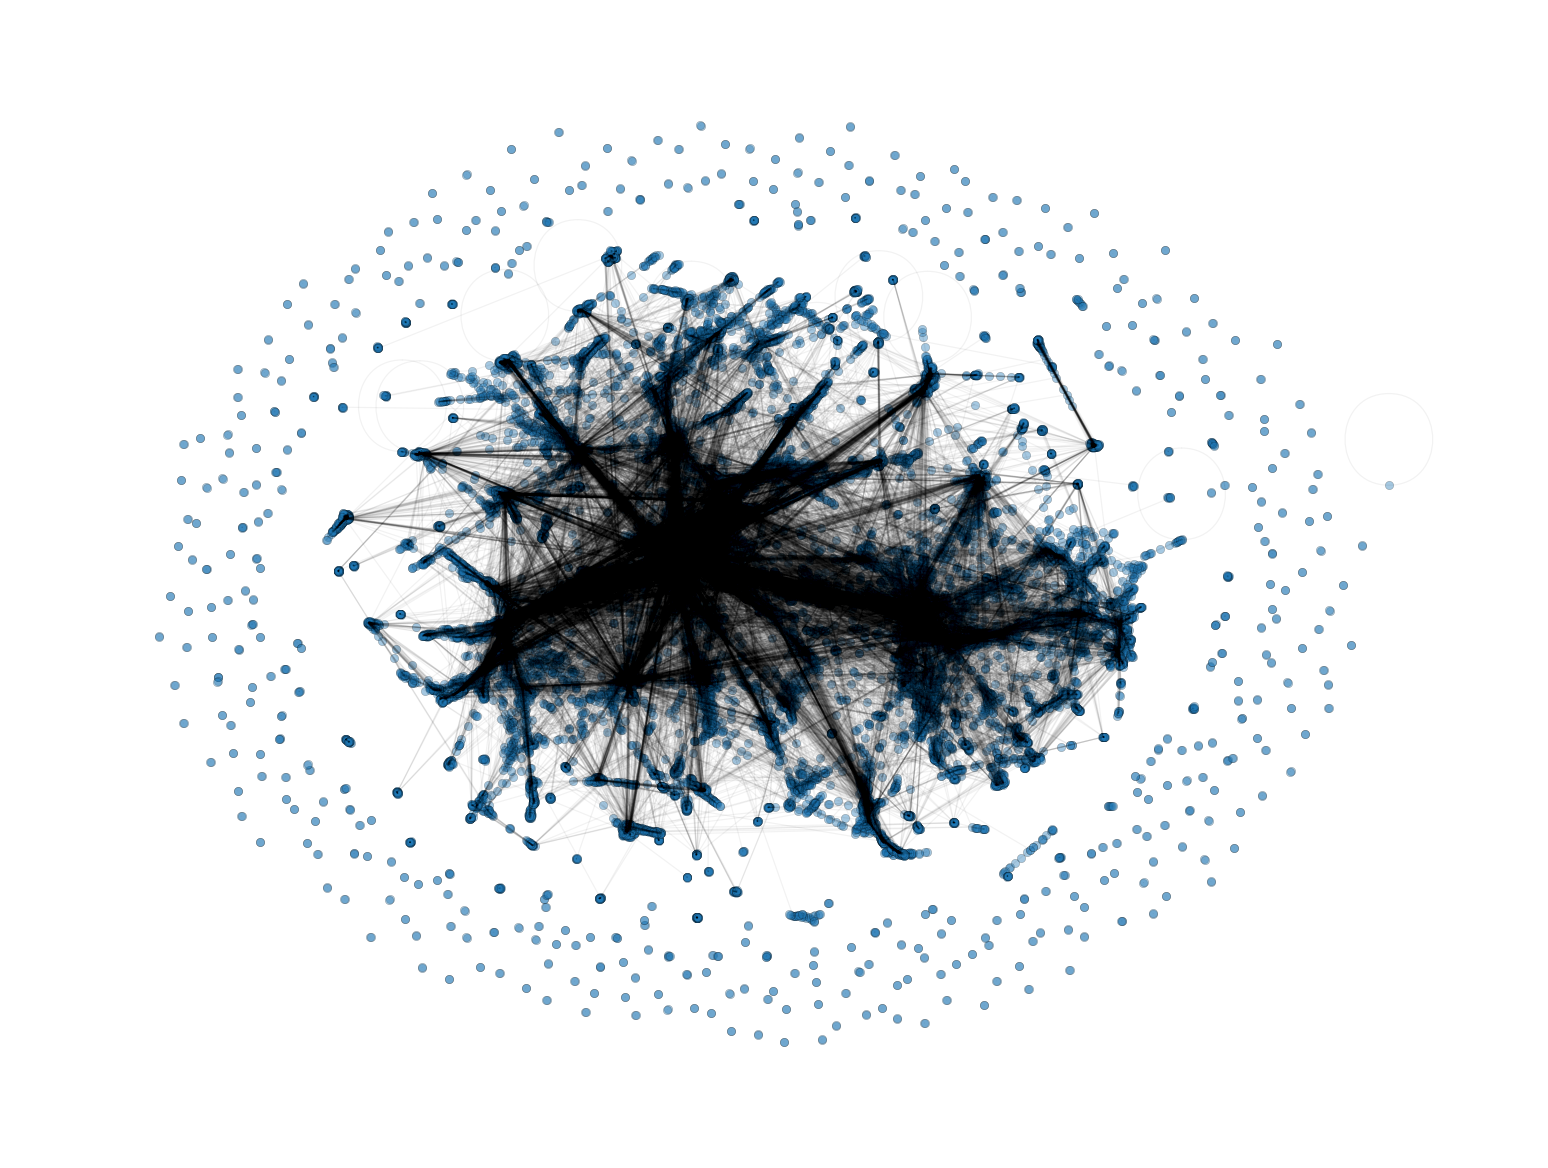

In [24]:
# Create a networkx graph from edges

G2000=nx.from_pandas_edgelist(df2000, 'White', 'Black', create_using=nx.DiGraph())

#print(nx.info(G))

# Convert to igraph

G_ig2000 = ig.Graph.TupleList(G2000.edges(), directed=True)

# Compute layout with drl of igraph

layt = G_ig2000.layout_drl()

 # Convert layt to a dictionary with key:vertex name and value:position

positions = {}

for i, vertex in enumerate(G_ig2000.vs):

    positions[vertex["name"]] = layt[i]

pos= np.array(list(positions.values()))

plt.figure(dpi=300)

# Draw the nodes with scatter

plt.scatter(pos[:,0], pos[:,1],  s=4,alpha=.4,edgecolor='black',linewidth=.1,cmap='tab20')

#for i, txt in enumerate(node_names):
 #   plt.annotate(txt, (pos[i, 0], pos[i, 1]), fontsize=3, alpha=0.8). PER I NOMI


# Draw a random sampling of edges

edges = np.array(G2000.edges())

edges = edges[np.random.choice(edges.shape[0], len(G2000.edges), replace=False), :]


# Draw the edges with networkx draw_networkx_edges

nx.draw_networkx_edges(G2000, positions, edgelist=edges, alpha=0.05, arrows=False, width=0.3)

plt.axis('off')

plt.show()

<ipython-input-26-2d3fa127b612>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", num_communities)


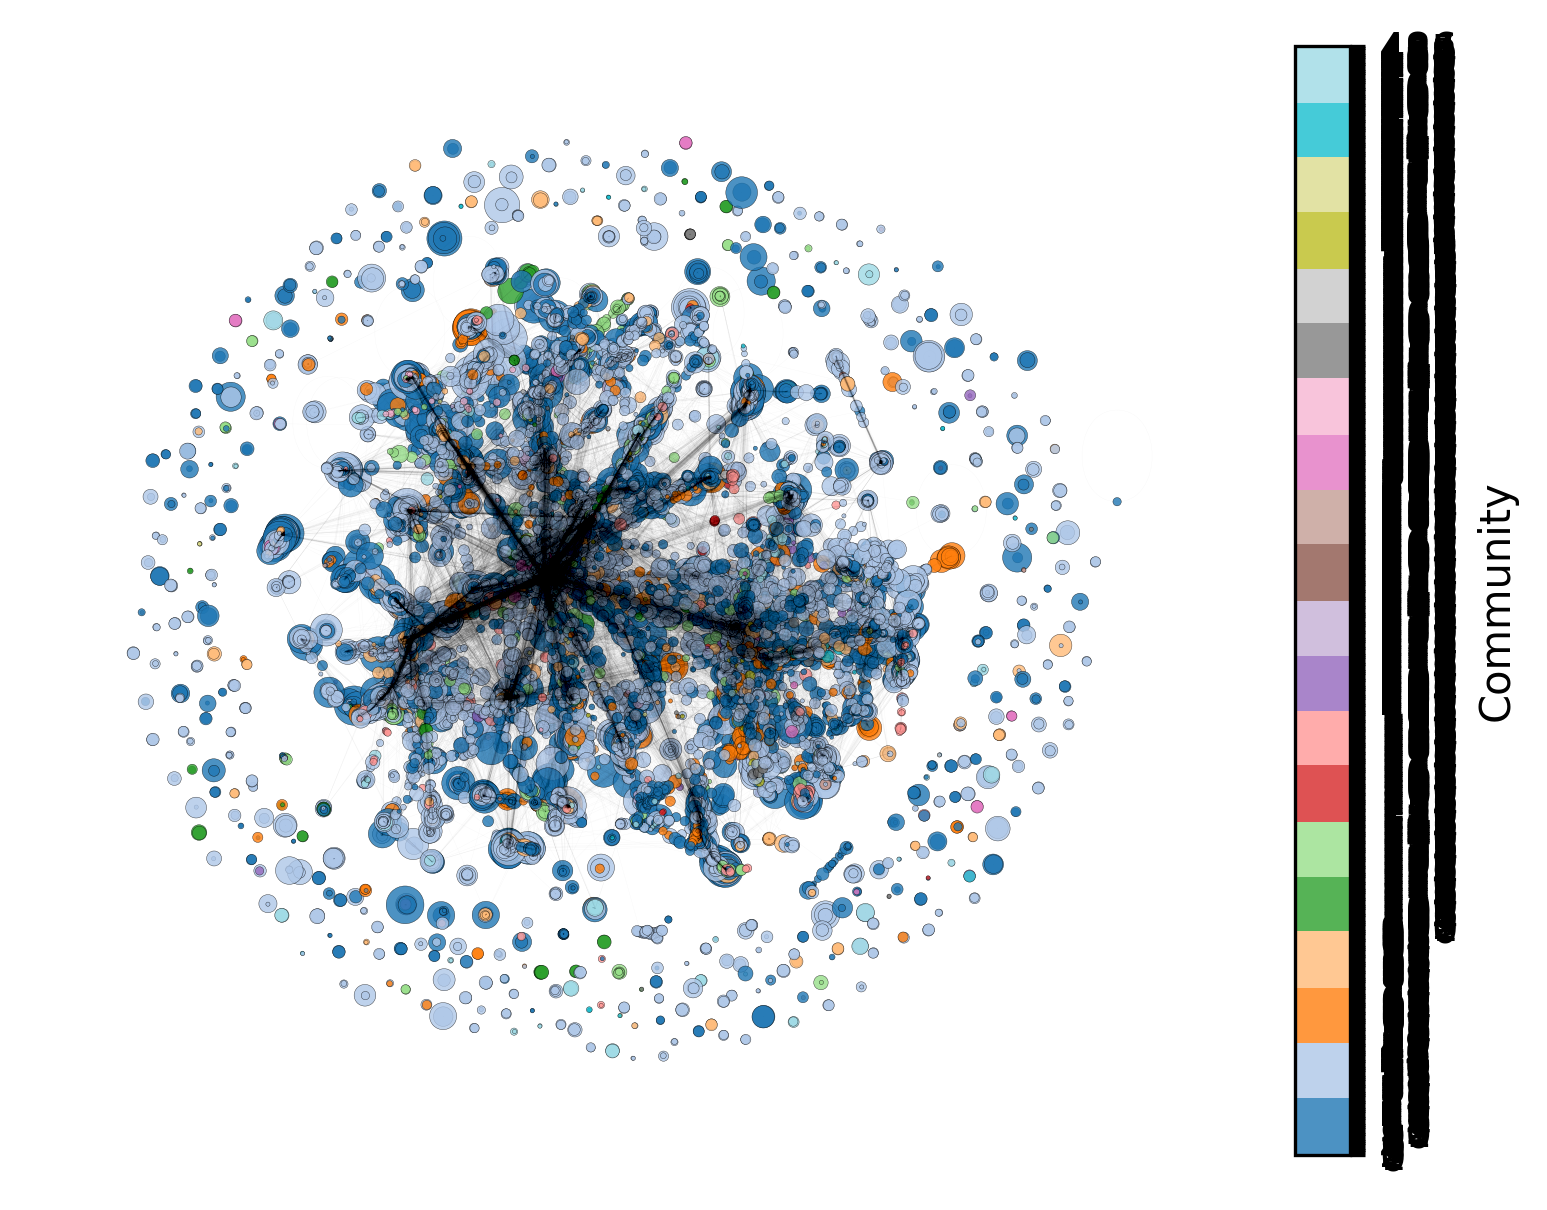

In [26]:
G2000=nx.from_pandas_edgelist(df2000, 'White', 'Black')
partition = community_louvain.best_partition(G2000, random_state=42)

# Convert the partition to a dictionary with key: node name and value: community label
community_labels = {node: community_id for node, community_id in partition.items()}

# Generate a color map for communities
num_communities = max(community_labels.values()) + 1
cmap = plt.cm.get_cmap("tab20", num_communities)

plt.figure(dpi=300)

# Draw the nodes with scatter and color them based on communities
scatter = plt.scatter(pos[:, 0], pos[:, 1], c=list(community_labels.values()), s=[G2000.degree(node) for node in G2000.nodes], alpha=.8, edgecolor='black', linewidth=.1, cmap=cmap)

# Draw the edges with networkx draw_networkx_edges
nx.draw_networkx_edges(G2000, positions, edgelist=edges, alpha=0.03, arrows=False, width=0.1)

# Add color bar for communities
cbar = plt.colorbar(scatter, ticks=np.arange(num_communities))
cbar.set_label('Community')

plt.axis('off')
plt.show()


In [27]:
list_of_comm2000 = []
for key in partition.keys():
  list_of_comm2000.append(partition[key])

In [28]:
len(set(list_of_comm2000))

487

In [29]:
def CommunityCounting(data_path):
  """
  Takes a dataframe as input and calculate the number of communities using Louvain comm. det. algo."""
  dataframe = clean_dataframe(data_path)
  dataframe = dataframe.dropna()
  G=nx.from_pandas_edgelist(dataframe, 'White', 'Black')
  partition = community_louvain.best_partition(G, random_state=42)

  community_labels = {node: community_id for node, community_id in partition.items()}

  list_of_communities = []
  for key in partition.keys():
    list_of_communities.append(partition[key])
  return len(set(list_of_communities))

In [30]:
path_list1 = []
path_list2 = []
for i in range(10,14,1):
  path_list1.append('/content/data_20'+str(i)+'.csv')
for i in range(15,18,1):
  path_list2.append('/content/data_20'+str(i)+'.csv')

path_list = path_list1 + path_list2

In [31]:
path_list

['/content/data_2010.csv',
 '/content/data_2011.csv',
 '/content/data_2012.csv',
 '/content/data_2013.csv',
 '/content/data_2015.csv',
 '/content/data_2016.csv',
 '/content/data_2017.csv']

In [32]:
num_of_comm = []
for path in path_list:
  num_of_comm.append(CommunityCounting(path))

In [164]:
len(num_of_comm)

7

In [169]:
plt.style.use('fivethirtyeight')

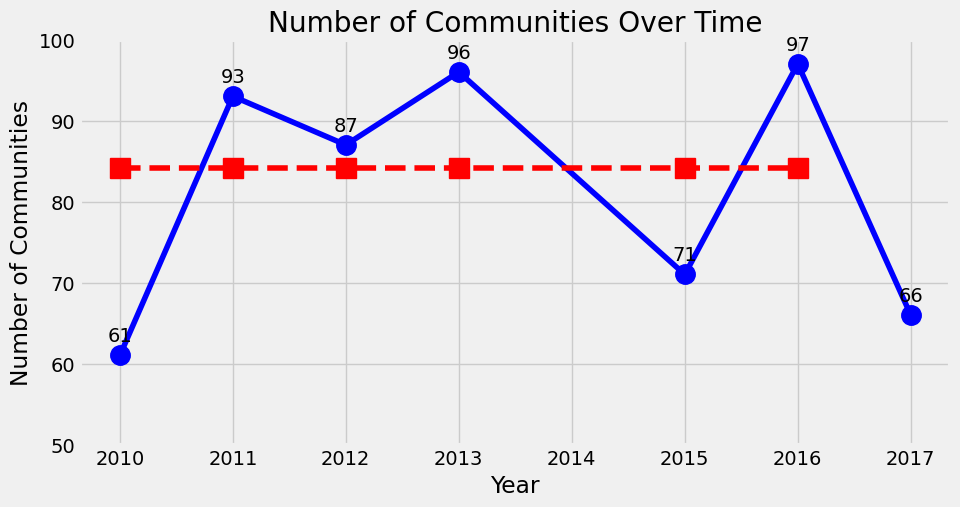

In [192]:
plt.figure(figsize=(10,5))
time = np.array([2010,2011,2012,2013,2015,2016,2017])
plt.plot(time, num_of_comm, marker='o', markersize=14, color='blue')
for i, (x, y) in enumerate(zip(time, num_of_comm)):
    plt.annotate(str(y), (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)
media_in_5anni_20102015_mancsa14_arr = media_in_5anni_20102015_mancsa14*np.ones(len(time[:6]))
plt.plot(time[:6], media_in_5anni_20102015_mancsa14_arr, color='red', marker='s', markersize=14, ls='--')
plt.xlabel('Year')
plt.ylabel('Number of Communities')
plt.title('Number of Communities Over Time')
plt.ylim(50,100)
plt.show()

In [179]:
media_in_5anni_20102015_mancsa14 = np.mean(num_of_comm[:6])

In [181]:
std_in_5anni_20102015_mancsa14 = np.std(num_of_comm[:6])

In [182]:
media_in_5anni_20102015_mancsa14, std_in_5anni_20102015_mancsa14

(84.16666666666667, 13.545191848852573)

{'Espineira Gonzalez, D': 474}


<ipython-input-230-40a678a75d3d>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(pos[:, 0], pos[:, 1],  s=8, alpha=.8, edgecolor='black', linewidth=.1, cmap='tab20')


(-602.4884223937988, 588.857349395752, -593.775627593994, 597.3510975646972)

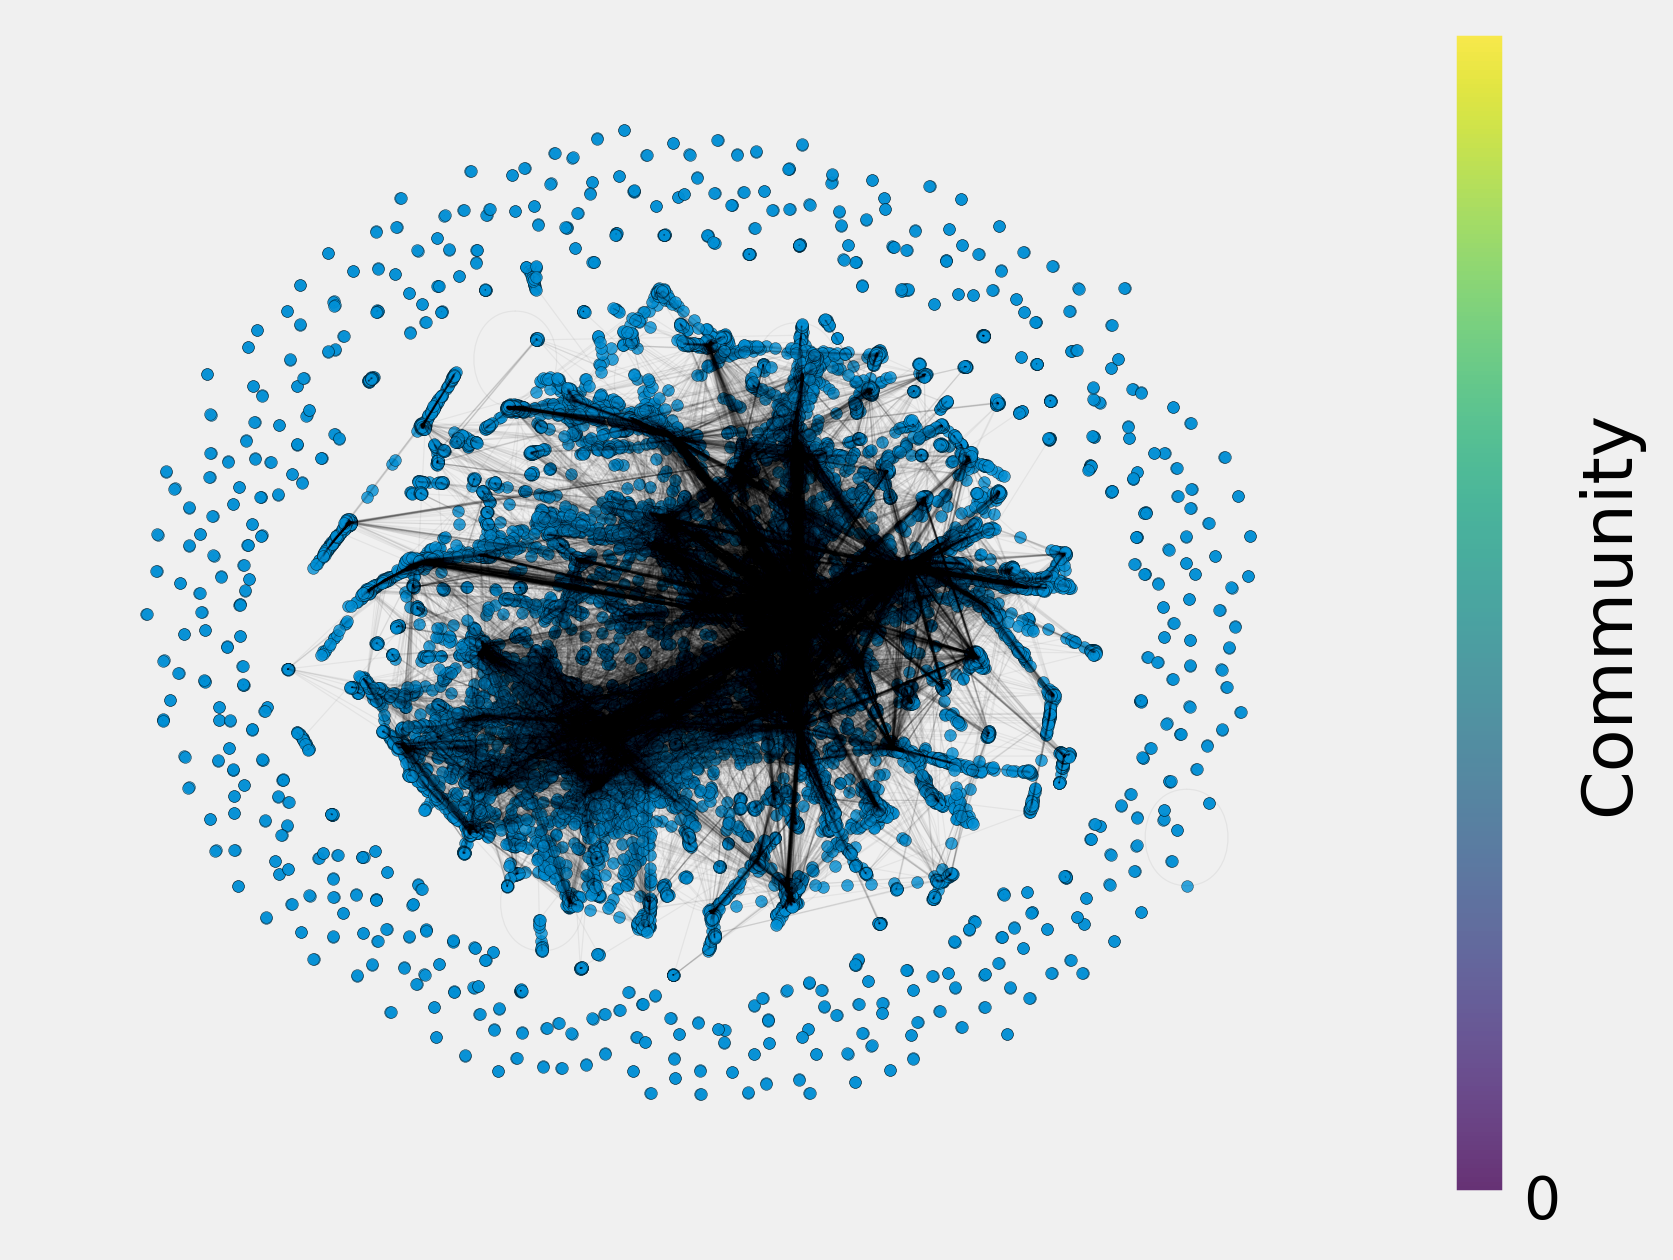

In [230]:
G = nx.from_pandas_edgelist(df2000, 'White', 'Black', create_using=nx.DiGraph())

G_ig = ig.Graph.TupleList(G.edges(), directed=True)
partition_leiden = leiden.find_partition(G_ig, leiden.ModularityVertexPartition)
community_labels = {node: community_id for community_id, nodes in enumerate(partition_leiden)}
print(community_labels)

#comm_values = [community_labels[node] for node in G.nodes()]
#print(comm_values)
# Extract the community IDs and convert to a list for color values
#community_ids = [community_labels[node].values() for node in G.nodes()]

plt.figure(dpi=300)

# Draw the nodes with scatter and color them based on community IDs
scatter = plt.scatter(pos[:, 0], pos[:, 1],  s=8, alpha=.8, edgecolor='black', linewidth=.1, cmap='tab20')

# Draw the edges with networkx draw_networkx_edges
nx.draw_networkx_edges(G, positions, edgelist=edges, alpha=0.05, arrows=False, width=0.3)

# Add color bar for communities
num_communities = len(set(comm_values))
cbar = plt.colorbar(scatter, ticks=np.arange(num_communities))
cbar.set_label('Community')

plt.axis('off')

In [231]:
community_labels = {node: community_id for community_id, nodes in enumerate(partition_leiden)}
community_labels

{'Espineira Gonzalez, D': 474}

In [219]:
print(list(G.nodes())[:10])  # Print a few nodes from G
print(list(community_labels.values())[:10])

['Cots Paltor, J', 'Loubatiere, J', 'Diakonov, M', 'Rechi Montes, X', 'Erlantz, M', 'Guennoun, A', 'Flear, C', 'Simonet, M', 'Garcia Boix, R', 'Touzane, O']
[478]


In [232]:
G = nx.from_pandas_edgelist(df2000, 'White', 'Black', create_using=nx.DiGraph())

G_ig = ig.Graph.TupleList(G.edges(), directed=True)
partition_leiden = leiden.find_partition(G_ig, leiden.ModularityVertexPartition)

In [236]:
community_labels = {node: community_id for community_id, nodes in partition_leiden}
community_labels

TypeError: ignored

In [237]:
G_ig = ig.Graph.TupleList(G.edges(), directed=True)
partition_leiden = leiden.find_partition(G_ig, leiden.ModularityVertexPartition)

# Count the number of nodes in each community
community_sizes = {}
for community_id, nodes in enumerate(partition_leiden):
    community_sizes[community_id] = len(nodes)

print("Community Sizes:", community_sizes)

Community Sizes: {0: 2820, 1: 1647, 2: 1629, 3: 1612, 4: 1410, 5: 1332, 6: 1240, 7: 1215, 8: 1127, 9: 1049, 10: 967, 11: 933, 12: 875, 13: 814, 14: 780, 15: 624, 16: 586, 17: 547, 18: 527, 19: 469, 20: 455, 21: 438, 22: 435, 23: 389, 24: 333, 25: 315, 26: 284, 27: 250, 28: 237, 29: 180, 30: 170, 31: 164, 32: 133, 33: 56, 34: 55, 35: 49, 36: 37, 37: 33, 38: 32, 39: 29, 40: 24, 41: 23, 42: 19, 43: 14, 44: 13, 45: 13, 46: 12, 47: 12, 48: 11, 49: 11, 50: 11, 51: 11, 52: 10, 53: 9, 54: 8, 55: 8, 56: 8, 57: 8, 58: 8, 59: 7, 60: 7, 61: 7, 62: 6, 63: 6, 64: 6, 65: 5, 66: 5, 67: 4, 68: 4, 69: 4, 70: 4, 71: 4, 72: 4, 73: 4, 74: 4, 75: 4, 76: 4, 77: 4, 78: 4, 79: 4, 80: 4, 81: 4, 82: 4, 83: 4, 84: 4, 85: 4, 86: 4, 87: 4, 88: 4, 89: 3, 90: 3, 91: 3, 92: 3, 93: 3, 94: 3, 95: 3, 96: 3, 97: 3, 98: 3, 99: 3, 100: 3, 101: 3, 102: 3, 103: 3, 104: 3, 105: 3, 106: 3, 107: 3, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 3, 114: 3, 115: 3, 116: 3, 117: 3, 118: 3, 119: 3, 120: 3, 121: 3, 122: 3, 123: 3, 124:

In [239]:
print((community_id))

477


In [242]:
G = nx.from_pandas_edgelist(df2000, 'White', 'Black', create_using=nx.DiGraph())


# Apply Leiden algorithm to detect communities
G_ig = ig.Graph.TupleList(G.edges(), directed=True)
partition_leiden = leiden.find_partition(G_ig, leiden.ModularityVertexPartition)

# Count the number of nodes in each community
community_sizes = {}
for community_id, nodes in enumerate(partition_leiden):
    community_sizes[community_id] = len(nodes)

# Clean and preprocess node names
community_labels = {node: community_id for community_id, nodes in enumerate(partition_leiden) for node in nodes}

# Generate a list of community sizes based on the community labels
comm_sizes_values = [community_sizes[community_labels[node]] for node in G.nodes()]

plt.figure(dpi=300)

# Draw the nodes with scatter and color them based on community IDs
scatter = plt.scatter(pos[:, 0], pos[:, 1], c=comm_sizes_values, s=8, alpha=.8, edgecolor='black', linewidth=.1, cmap='tab20')

# Draw the edges with networkx draw_networkx_edges
nx.draw_networkx_edges(G, positions, edgelist=edges, alpha=0.05, arrows=False, width=0.3)

# Add color bar for communities
num_communities = len(set(comm_sizes_values))
cbar = plt.colorbar(scatter, ticks=np.arange(num_communities))
cbar.set_label('Community')

plt.axis('off')



KeyError: ignored

# QUI VEDIAMO DOPO QUANTO TEMPO (ELO) I BIG TOP20 SI AGGREGANO NELLA STESSA COMMUNITY



In [34]:
path2020 = '/content/Copia di chess_data_2020.csv'

df2020 = clean_dataframe(path2020)
df2020

White        Black Result          Date  \
0              Carlsen, M     Dubov, D    1-0  Dec 29, 2020   
1      Vachier Lagrave, M        So, W    ½-½  Dec 29, 2020   
2             Nakamura, H   Aronian, L    ½-½  Dec 29, 2020   
3       Nepomniachtchi, I  Radjabov, T    ½-½  Dec 29, 2020   
4                Dubov, D   Carlsen, M    ½-½  Dec 29, 2020   
...                   ...          ...    ...           ...   
20173        Grabinsky, A     Iotov, V    1-0  Jan 05, 2020   
20174          Ringoir, T    Mulyar, M    1-0  Jan 05, 2020   
20175          Wheeler, C   Brodsky, D    1-0  Jan 05, 2020   
20176           Korley, K     Narva, M    1-0  Jan 05, 2020   
20177           Sarkar, J   Petesch, G    1-0  Jan 05, 2020   

                                                 Opening  
0                          C77 Ruy Lopez, Morphy defence  
1          C67 Ruy Lopez, Berlin defence, open variation  
2         D38 Queen's Gambit Declined, Ragozin variation  
3                   D35 Queen's Gambit Declined, 3...Nf6  
4                               E04 Catalan, open, 5.Nf3  
...                                                  ...  
20173                              D00 Queen's pawn game  
20174           D10 Queen's Gambit Declined Slav defence  
20175                              A45 Queen's pawn game  
20176  D63 Queen's Gambit Declined, Orthodox defence,...  
20177             C83 Ruy Lopez, open, classical defence  

[18656 rows x 5 columns]

In [40]:
top_player_list = ["Carlsen, M", "Caruana, F", "Ding, L", "Grischuk, A", "Aronian, L", "Nepomniachtchi, I",
                   "Topalov, V", "Vitiugov, N",  "Karjakin, S", "Kramnik, V",  "Nakamura, H", "Dominguez Perez, L",
                   "Rapport, R",  "Anand, V",  "Wang, H",  "Radjabov, T",  "Giri, A", "Mamedyarov, S",
                   "Vachier Lagrave, M", "Firouzja, A"]

<ipython-input-35-57b5e9cd3025>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pos[:,0], pos[:,1],  s=4,alpha=.4,edgecolor='black',linewidth=.1,cmap='tab20')


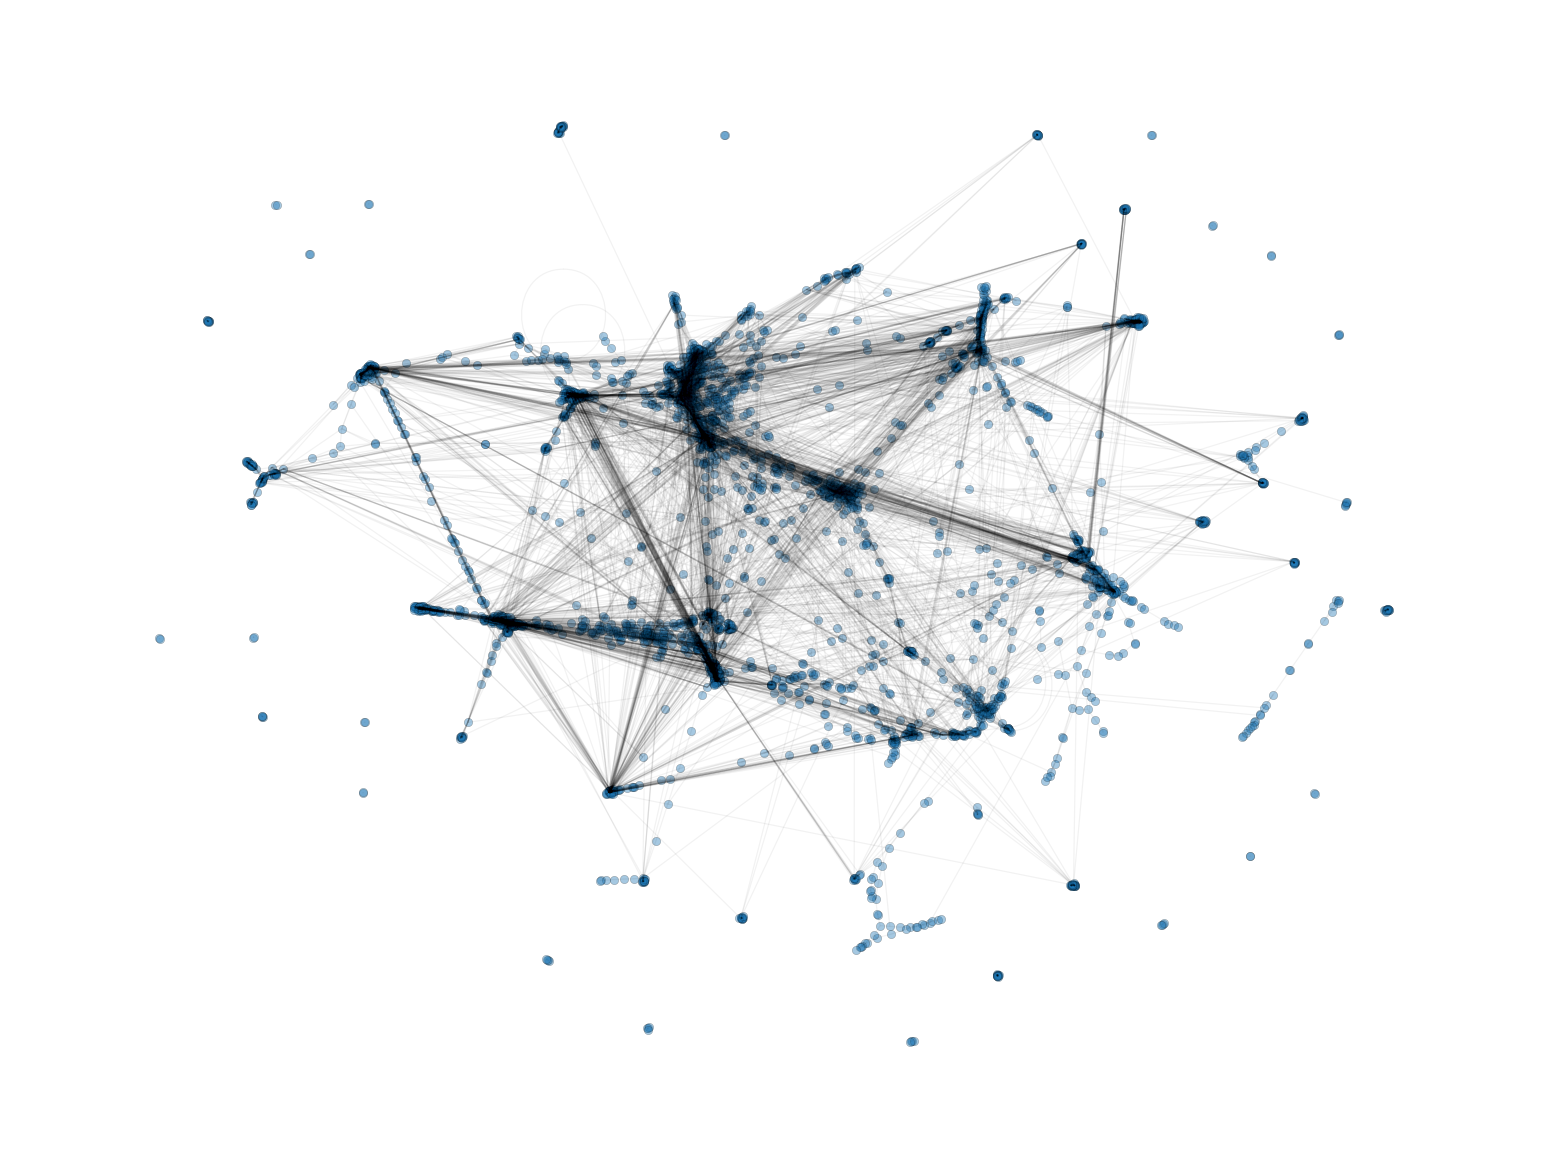

In [35]:
# Create a networkx graph from edges

G2020=nx.from_pandas_edgelist(df2020, 'White', 'Black', create_using=nx.DiGraph())

#print(nx.info(G))

# Convert to igraph

G_ig2020 = ig.Graph.TupleList(G2020.edges(), directed=True)

# Compute layout with drl of igraph

layt = G_ig2020.layout_drl()

 # Convert layt to a dictionary with key:vertex name and value:position

positions = {}

for i, vertex in enumerate(G_ig2020.vs):

    positions[vertex["name"]] = layt[i]

pos= np.array(list(positions.values()))

plt.figure(dpi=300)

# Draw the nodes with scatter

plt.scatter(pos[:,0], pos[:,1],  s=4,alpha=.4,edgecolor='black',linewidth=.1,cmap='tab20')

#for i, txt in enumerate(node_names):
 #   plt.annotate(txt, (pos[i, 0], pos[i, 1]), fontsize=3, alpha=0.8). PER I NOMI


# Draw a random sampling of edges

edges = np.array(G2020.edges())

edges = edges[np.random.choice(edges.shape[0], len(G2020.edges), replace=False), :]


# Draw the edges with networkx draw_networkx_edges

nx.draw_networkx_edges(G2020, positions, edgelist=edges, alpha=0.05, arrows=False, width=0.3)

plt.axis('off')

plt.show()

<ipython-input-36-da885ca2fe27>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", num_communities)


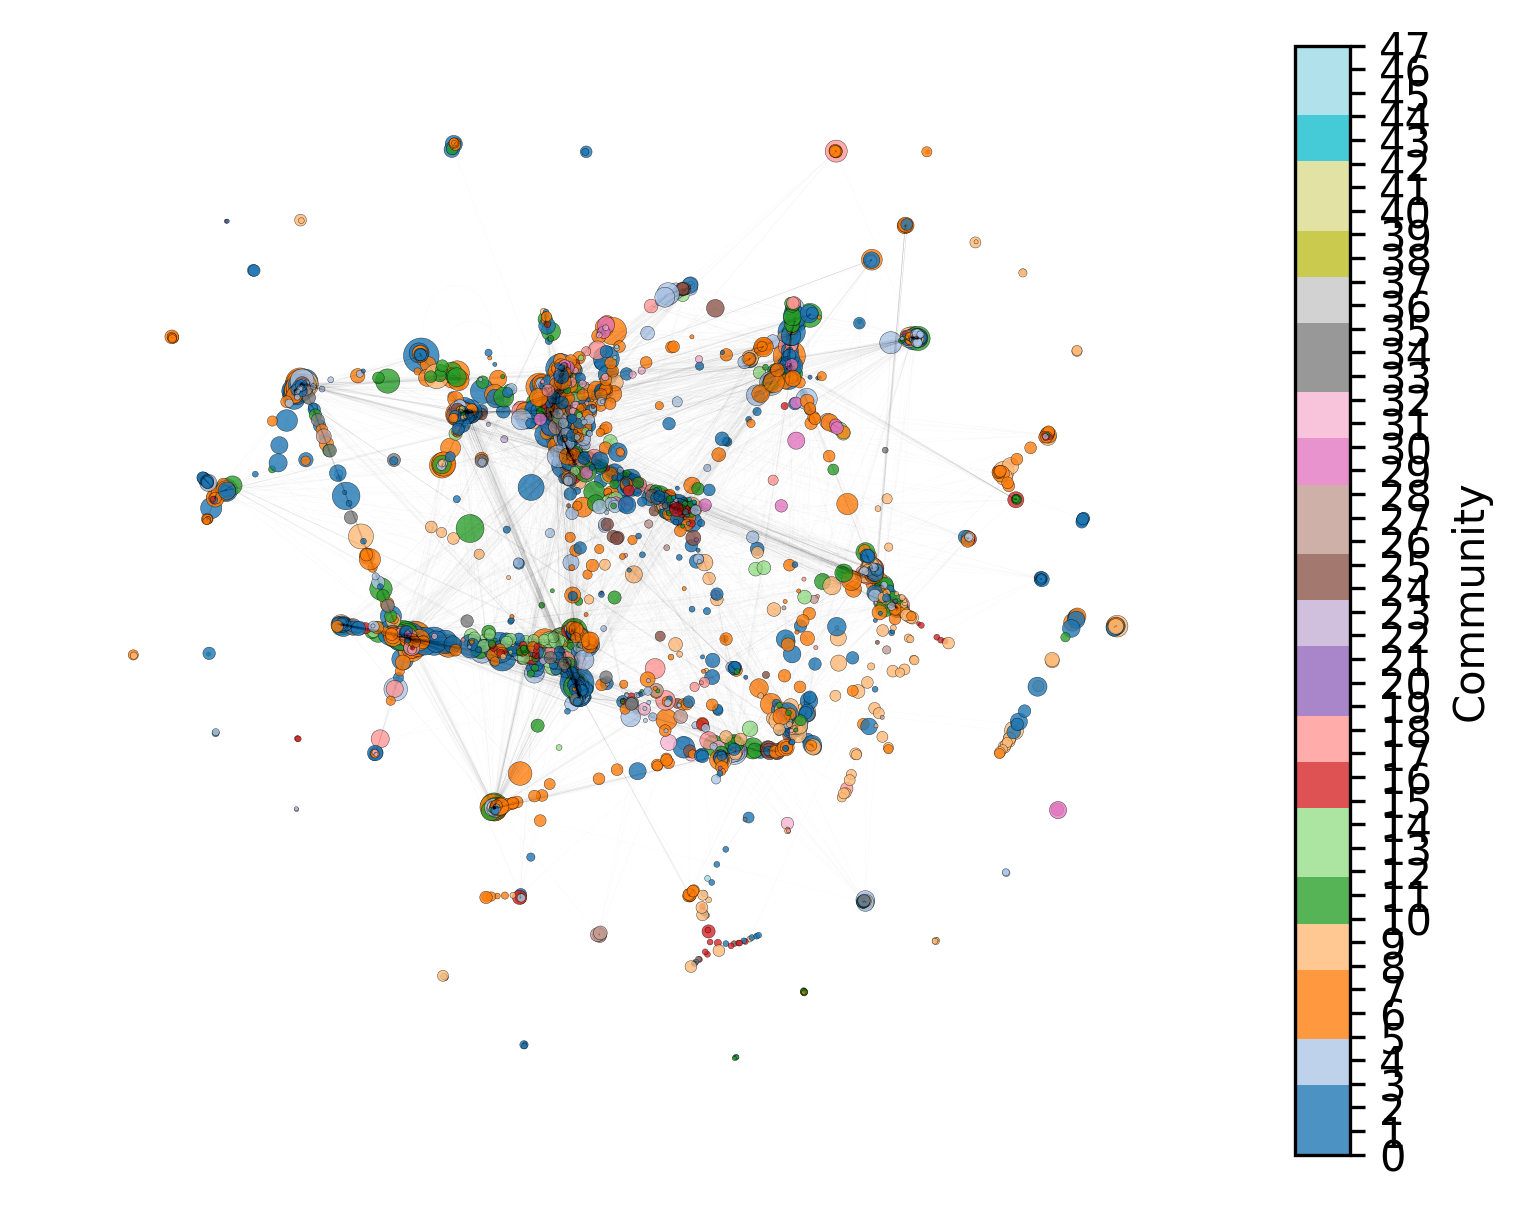

In [36]:
G2020=nx.from_pandas_edgelist(df2020, 'White', 'Black')
partition = community_louvain.best_partition(G2020, random_state=42)

# Convert the partition to a dictionary with key: node name and value: community label
community_labels = {node: community_id for node, community_id in partition.items()}

# Generate a color map for communities
num_communities = max(community_labels.values()) + 1
cmap = plt.cm.get_cmap("tab20", num_communities)

plt.figure(dpi=300)

# Draw the nodes with scatter and color them based on communities
scatter = plt.scatter(pos[:, 0], pos[:, 1], c=list(community_labels.values()), s=[G2020.degree(node) for node in G2020.nodes], alpha=.8, edgecolor='black', linewidth=.1, cmap=cmap)

# Draw the edges with networkx draw_networkx_edges
nx.draw_networkx_edges(G2020, positions, edgelist=edges, alpha=0.03, arrows=False, width=0.1)

# Add color bar for communities
cbar = plt.colorbar(scatter, ticks=np.arange(num_communities))
cbar.set_label('Community')

plt.axis('off')
plt.show()

In [47]:
dizionario_of_GM_comm_associate = {}
for i in community_labels.keys():
  if i in top_player_list:
    dizionario_of_GM_comm_associate[i] = community_labels[i]
    print(i)

Carlsen, M
Vachier Lagrave, M
Nakamura, H
Aronian, L
Nepomniachtchi, I
Radjabov, T
Giri, A
Grischuk, A
Karjakin, S
Vitiugov, N
Ding, L
Firouzja, A
Dominguez Perez, L
Caruana, F
Rapport, R
Mamedyarov, S
Anand, V
Kramnik, V
Wang, H
Topalov, V


In [48]:
dizionario_of_GM_comm_associate

{'Carlsen, M': 0,
 'Vachier Lagrave, M': 0,
 'Nakamura, H': 0,
 'Aronian, L': 0,
 'Nepomniachtchi, I': 0,
 'Radjabov, T': 0,
 'Giri, A': 0,
 'Grischuk, A': 0,
 'Karjakin, S': 0,
 'Vitiugov, N': 0,
 'Ding, L': 0,
 'Firouzja, A': 0,
 'Dominguez Perez, L': 0,
 'Caruana, F': 0,
 'Rapport, R': 3,
 'Mamedyarov, S': 0,
 'Anand, V': 0,
 'Kramnik, V': 0,
 'Wang, H': 0,
 'Topalov, V': 0}

# DA QUI TUTTI (TRANNE RAPPORT) STANNO NELLA STESSA COMMUNITY (LA NUMERO 0)


In [50]:
path2010 = '/content/data_2010.csv'

df2010 = clean_dataframe(path2010)
df2010

White         Black Result          Date  \
0         Onischuk, A  Movsesian, S    ½-½  Dec 28, 2010   
1          Caruana, F   Ivanchuk, V    ½-½  Dec 28, 2010   
2            Short, N   Gashimov, V    1-0  Dec 28, 2010   
3     Vallejo Pons, F     Godena, M    1-0  Dec 28, 2010   
4           Navara, D    Caruana, F    1-0  Dec 29, 2010   
...               ...           ...    ...           ...   
5163        Shirov, A    Kramnik, V    ½-½  Oct 15, 2010   
5311       Eichner, S  Dgebuadze, A    0-1  Apr 10, 2011   
5312      Swinkels, R   Wichmann, C    ½-½  Apr 10, 2011   
5313         Heinz, J        Bok, B    1-0  Apr 10, 2011   
5314       Popovic, P   Schnabel, R    1-0  Apr 10, 2011   

                                              Opening  
0     E58 Nimzo-Indian, 4.e3, main line with 8...Bxc3  
1                                   A81 Dutch defence  
2                               B90 Sicilian, Najdorf  
3                           C51 Evans gambit declined  
4                                B33 Sicilian defence  
...                                               ...  
5163             E25 Nimzo-Indian, Saemisch variation  
5311                          E11 Bogo-Indian defence  
5312          D11 Queen's Gambit Declined Slav, 3.Nf3  
5313                                 A40 Queen's pawn  
5314        B01 Scandinavian (centre counter) defence  

[4459 rows x 5 columns]

In [51]:
def create_community(df):

  G=nx.from_pandas_edgelist(df, 'White', 'Black')
  partition = community_louvain.best_partition(G, random_state=42)
  community_labels = {node: community_id for node, community_id in partition.items()}
  num_communities = max(community_labels.values()) + 1
  return community_labels, num_communities


In [54]:
def find_GMTOP20_comm(community_labels):
  dizionario_of_GM_comm_associate = {}
  for i in community_labels.keys():
    if i in top_player_list:
      dizionario_of_GM_comm_associate[i] = community_labels[i]
  return dizionario_of_GM_comm_associate

In [52]:
comm_label2010, num_comm2010 = create_community(df2010)
#top20_2010 = find_GMTOP20_comm(comm_label2010)
#top20_2010

In [55]:
top20_2010 = find_GMTOP20_comm(comm_label2010)
top20_2010

{'Caruana, F': 0,
 'Karjakin, S': 0,
 'Nepomniachtchi, I': 0,
 'Vachier Lagrave, M': 0,
 'Vitiugov, N': 0,
 'Grischuk, A': 0,
 'Carlsen, M': 0,
 'Kramnik, V': 0,
 'Anand, V': 0,
 'Nakamura, H': 0,
 'Giri, A': 0,
 'Wang, H': 0,
 'Rapport, R': 6,
 'Topalov, V': 0,
 'Radjabov, T': 0,
 'Aronian, L': 0,
 'Mamedyarov, S': 0}

In [66]:
df = pd.read_csv(path20052006)
df

White            Black Result Round          Date  \
0             Buscar, M    Filipovich, D    1-0   1.0  Oct 27, 2004   
1          Dougherty, M       Findlay, I    ½-½   1.0  Oct 27, 2004   
2               Kret, T      Urquhart, E    0-1   1.0  Oct 27, 2004   
3          Milicevic, G         Krnan, T    1-0   1.0  Oct 27, 2004   
4            Findlay, I           Rek, S    ½-½   1.0  Nov 16, 2004   
...                 ...              ...    ...   ...           ...   
211860         Cheng, B  Kraiouchkine, N    1-0     6  Jul 12, 2006   
211861     Zhou Haonan,         Henry, L    0-1     6  Jul 12, 2006   
211862         Cheng, B        Walker, A    1-0     7  Jul 13, 2006   
211863         Henry, L      Derraugh, G    1-0     7  Jul 13, 2006   
211864  Kraiouchkine, N     Zhou Haonan,    ½-½     7  Jul 13, 2006   

                                                  Opening View  Unnamed: 0  \
0                                        B07 Pirc defence  NaN         NaN   
1             A39 English, symmetrical, main line with d4  NaN         NaN   
2                                   E10 Queen's pawn game  NaN         NaN   
3                      C47 Four knights, Scotch variation  NaN         NaN   
4                                  A43 Old Benoni defence  NaN         NaN   
...                                                   ...  ...         ...   
211860                                    C28 Vienna game  NaN         NaN   
211861                A42 Modern defence, Averbakh system  NaN         NaN   
211862                                    C27 Vienna game  NaN         NaN   
211863  C85 Ruy Lopez, Exchange variation doubly defer...  NaN         NaN   
211864                      C02 French, advance variation  NaN         NaN   

        Name Name.1  ELO  Points Unnamed: 7  
0        NaN    NaN  NaN     NaN        NaN  
1        NaN    NaN  NaN     NaN        NaN  
2        NaN    NaN  NaN     NaN        NaN  
3        NaN    NaN  NaN     NaN        NaN  
4        NaN    NaN  NaN     NaN        NaN  
...      ...    ...  ...     ...        ...  
211860   NaN    NaN  NaN     NaN        NaN  
211861   NaN    NaN  NaN     NaN        NaN  
211862   NaN    NaN  NaN     NaN        NaN  
211863   NaN    NaN  NaN     NaN        NaN  
211864   NaN    NaN  NaN     NaN        NaN  

[211865 rows x 13 columns]

In [69]:
df0506

White            Black Result Date  \
0             Buscar, M    Filipovich, D    1-0  NaT   
1          Dougherty, M       Findlay, I    ½-½  NaT   
2               Kret, T      Urquhart, E    0-1  NaT   
3          Milicevic, G         Krnan, T    1-0  NaT   
4            Findlay, I           Rek, S    ½-½  NaT   
...                 ...              ...    ...  ...   
211860         Cheng, B  Kraiouchkine, N    1-0  NaT   
211861     Zhou Haonan,         Henry, L    0-1  NaT   
211862         Cheng, B        Walker, A    1-0  NaT   
211863         Henry, L      Derraugh, G    1-0  NaT   
211864  Kraiouchkine, N     Zhou Haonan,    ½-½  NaT   

                                                  Opening  
0                                        B07 Pirc defence  
1             A39 English, symmetrical, main line with d4  
2                                   E10 Queen's pawn game  
3                      C47 Four knights, Scotch variation  
4                                  A43 Old Benoni defence  
...                                                   ...  
211860                                    C28 Vienna game  
211861                A42 Modern defence, Averbakh system  
211862                                    C27 Vienna game  
211863  C85 Ruy Lopez, Exchange variation doubly defer...  
211864                      C02 French, advance variation  

[186847 rows x 5 columns]

In [71]:
path1315 = '/content/Copia di chess_data_20132015.csv'

df1315 = clean_dataframe(path1315)
df1315['Date'] = pd.to_datetime(df1315['Date'])

# Create DataFrames for 2013 and 2014
df13 = df1315[df1315['Date'].dt.year == 2013]


In [72]:
df13

White              Black Result       Date  \
21      Bejtovic, J        Semcesen, D    ½-½ 2013-12-30   
22      Lindgren, P          Hansen, T    ½-½ 2013-12-30   
23         Mihok, O           Sagit, R    0-1 2013-12-30   
24     Krupenski, J         Akesson, R    1-0 2013-12-30   
25        Lauber, A         Furhoff, J    ½-½ 2013-12-30   
...             ...                ...    ...        ...   
28865    Abdalla, L      Liascovich, L    ½-½ 2013-01-06   
28866  Feliciano, V  Viana da Costa, F    0-1 2013-01-06   
28867   D'Israel, D    Aranha Filho, A    ½-½ 2013-01-06   
28868       Giri, A         Mesaros, F    ½-½ 2013-01-04   
28869      Huber, M            Giri, A    ½-½ 2013-01-04   

                                            Opening  
21                    C77 Ruy Lopez, Morphy defence  
22                                A81 Dutch defence  
23                            B90 Sicilian, Najdorf  
24                       E12 Queen's Indian defence  
25     D47 Queen's Gambit Declined semi-Slav, 7.Bc4  
...                                             ...  
28865             D25 Queen's Gambit Accepted, 4.e3  
28866           A42 Modern defence, Averbakh system  
28867                           E01 Catalan, closed  
28868                         B90 Sicilian, Najdorf  
28869             D85 Gruenfeld, exchange variation  

[23607 rows x 5 columns]

In [73]:
comm_label2013, num_comm2013 = create_community(df13)
top20_2013 = find_GMTOP20_comm(comm_label2013)
top20_2013

{'Grischuk, A': 7,
 'Dominguez Perez, L': 7,
 'Vachier Lagrave, M': 7,
 'Nepomniachtchi, I': 16,
 'Mamedyarov, S': 7,
 'Giri, A': 7,
 'Aronian, L': 7,
 'Wang, H': 7,
 'Radjabov, T': 7,
 'Karjakin, S': 7,
 'Kramnik, V': 7,
 'Anand, V': 7,
 'Nakamura, H': 7,
 'Caruana, F': 7,
 'Rapport, R': 7,
 'Ding, L': 9,
 'Vitiugov, N': 16,
 'Carlsen, M': 7,
 'Topalov, V': 7}

In [74]:
df14 = df1315[df1315['Date'].dt.year == 2014]

comm_label2014, num_comm2014 = create_community(df14)
top20_2014 = find_GMTOP20_comm(comm_label2014)
top20_2014

{'Rapport, R': 0,
 'Giri, A': 0,
 'Vachier Lagrave, M': 0,
 'Aronian, L': 0,
 'Vitiugov, N': 0,
 'Mamedyarov, S': 0,
 'Dominguez Perez, L': 0,
 'Nepomniachtchi, I': 0,
 'Wang, H': 0,
 'Grischuk, A': 0,
 'Radjabov, T': 0,
 'Kramnik, V': 0,
 'Anand, V': 0,
 'Caruana, F': 0,
 'Nakamura, H': 0,
 'Karjakin, S': 0,
 'Ding, L': 0,
 'Carlsen, M': 0,
 'Topalov, V': 0}

In [75]:
path12 = '/content/data_2012.csv'
path11 = '/content/data_2011.csv'
df12 = clean_dataframe(path12)
df11 = clean_dataframe(path11)

comm_label2011, num_comm2011 = create_community(df11)
comm_label2012, num_comm2012 = create_community(df12)
top20_2011 = find_GMTOP20_comm(comm_label2011)
top20_2012 = find_GMTOP20_comm(comm_label2012)
print('2011:', top20_2011), print('2012', top20_2012)

2011: {'Giri, A': 1, 'Vitiugov, N': 2, 'Nakamura, H': 1, 'Caruana, F': 1, 'Rapport, R': 1, 'Karjakin, S': 1, 'Dominguez Perez, L': 1, 'Vachier Lagrave, M': 1, 'Grischuk, A': 1, 'Wang, H': 1, 'Mamedyarov, S': 1, 'Anand, V': 1, 'Carlsen, M': 1, 'Kramnik, V': 1, 'Aronian, L': 1, 'Nepomniachtchi, I': 1, 'Topalov, V': 1, 'Radjabov, T': 1, 'Ding, L': 1}
2012 {'Grischuk, A': 0, 'Karjakin, S': 0, 'Nepomniachtchi, I': 1, 'Giri, A': 0, 'Vachier Lagrave, M': 1, 'Aronian, L': 0, 'Mamedyarov, S': 0, 'Nakamura, H': 0, 'Wang, H': 0, 'Radjabov, T': 0, 'Ding, L': 0, 'Carlsen, M': 0, 'Kramnik, V': 0, 'Anand, V': 0, 'Caruana, F': 0, 'Dominguez Perez, L': 0, 'Topalov, V': 0, 'Vitiugov, N': 1, 'Rapport, R': 6}


(None, None)

In [76]:
top20_2011

{'Giri, A': 1,
 'Vitiugov, N': 2,
 'Nakamura, H': 1,
 'Caruana, F': 1,
 'Rapport, R': 1,
 'Karjakin, S': 1,
 'Dominguez Perez, L': 1,
 'Vachier Lagrave, M': 1,
 'Grischuk, A': 1,
 'Wang, H': 1,
 'Mamedyarov, S': 1,
 'Anand, V': 1,
 'Carlsen, M': 1,
 'Kramnik, V': 1,
 'Aronian, L': 1,
 'Nepomniachtchi, I': 1,
 'Topalov, V': 1,
 'Radjabov, T': 1,
 'Ding, L': 1}

In [77]:
top20_2012

{'Grischuk, A': 0,
 'Karjakin, S': 0,
 'Nepomniachtchi, I': 1,
 'Giri, A': 0,
 'Vachier Lagrave, M': 1,
 'Aronian, L': 0,
 'Mamedyarov, S': 0,
 'Nakamura, H': 0,
 'Wang, H': 0,
 'Radjabov, T': 0,
 'Ding, L': 0,
 'Carlsen, M': 0,
 'Kramnik, V': 0,
 'Anand, V': 0,
 'Caruana, F': 0,
 'Dominguez Perez, L': 0,
 'Topalov, V': 0,
 'Vitiugov, N': 1,
 'Rapport, R': 6}

<ipython-input-79-1e5f9952d7db>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", num_communities)


IndexError: ignored

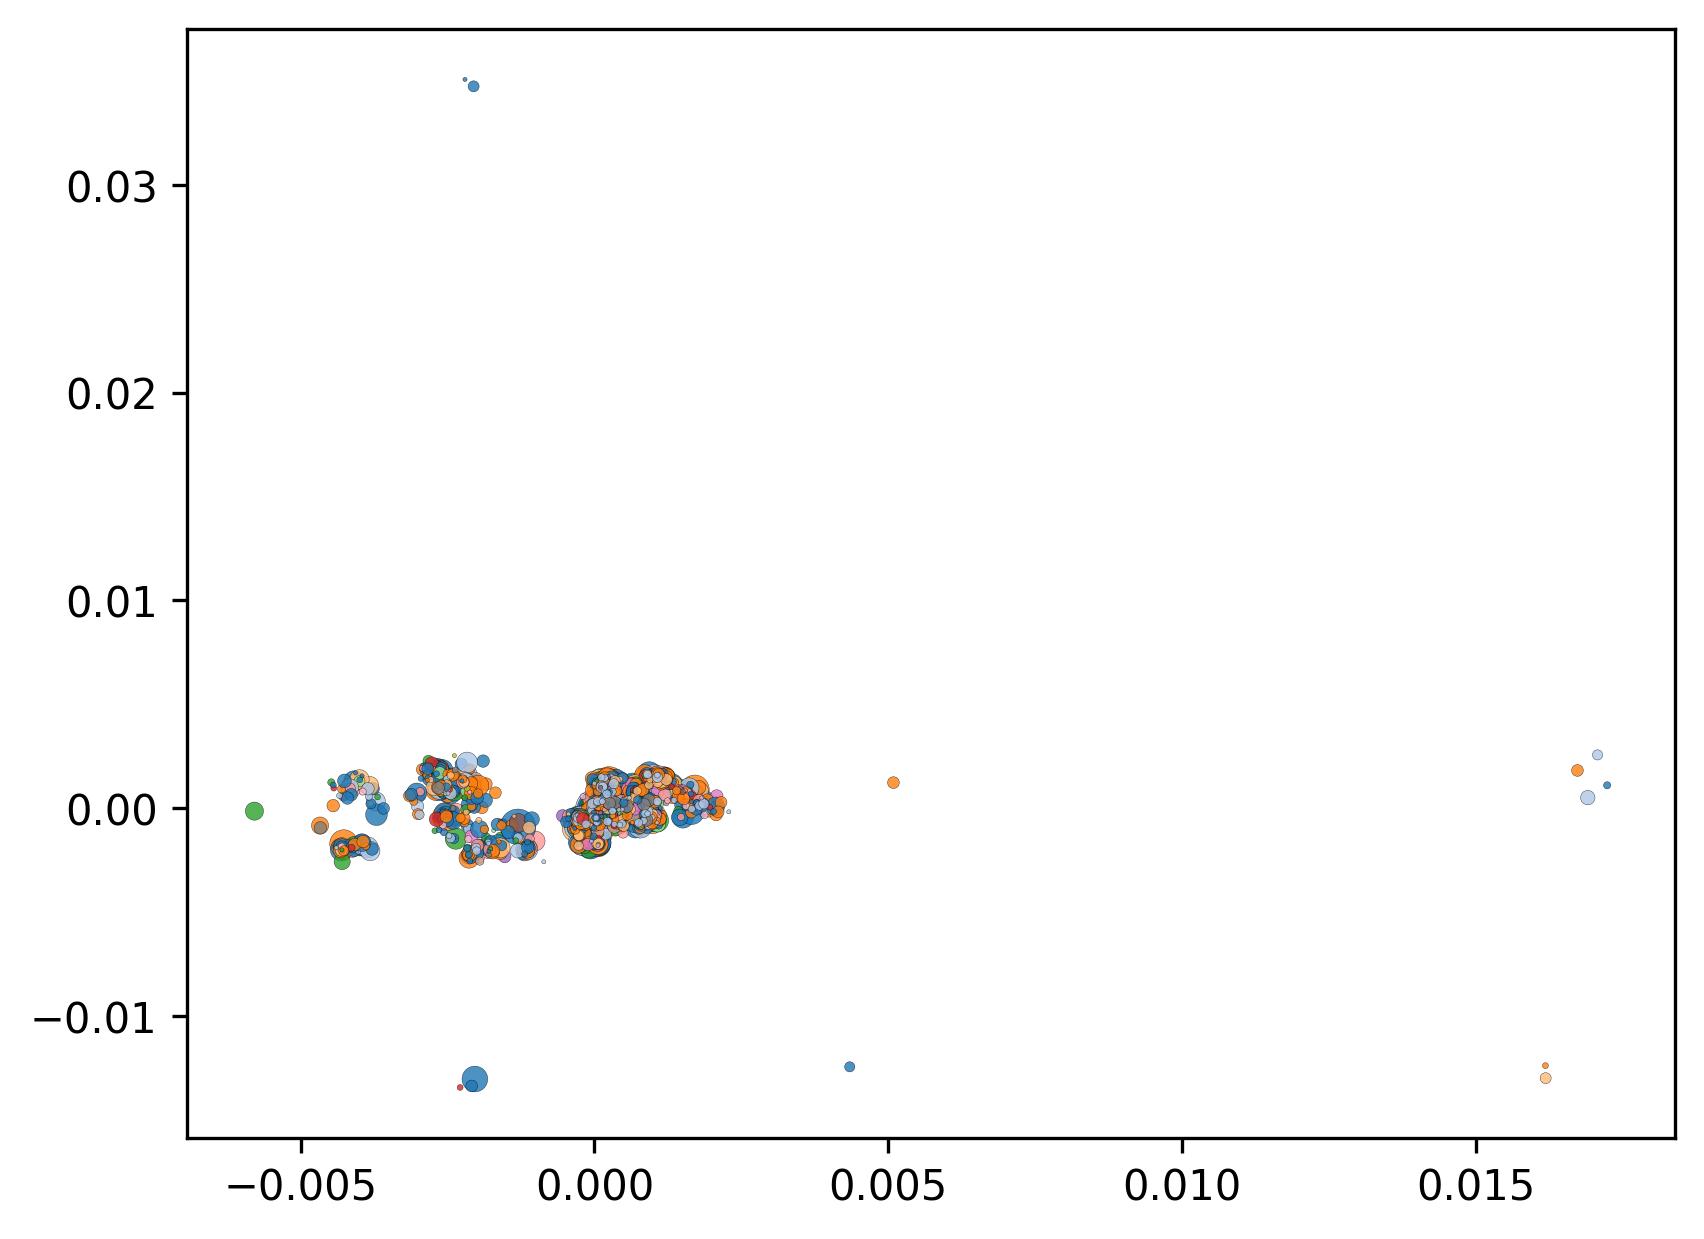

In [79]:
import networkx as nx
import community   # You might need to import this if it's not already imported
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding

# Assuming 'df2020', 'pos', and 'edges' are defined

G2020 = nx.from_pandas_edgelist(df2020, 'White', 'Black')
partition = community_louvain.best_partition(G2020, random_state=42)
#partition = community.best_partition(G2020, random_state=42)

# Convert the partition to a dictionary with key: node name and value: community label
community_labels = {node: community_id for node, community_id in partition.items()}

# Generate a color map for communities
num_communities = max(community_labels.values()) + 1
cmap = plt.cm.get_cmap("tab20", num_communities)

# Use Spectral Embedding to create new positions based on communities
spectral = SpectralEmbedding(n_components=2, random_state=42)
new_positions = spectral.fit_transform(np.eye(len(G2020)))

plt.figure(dpi=300)

# Draw the nodes with scatter and color them based on communities
scatter = plt.scatter(new_positions[:, 0], new_positions[:, 1], c=list(community_labels.values()), s=[G2020.degree(node) for node in G2020.nodes], alpha=.8, edgecolor='black', linewidth=.1, cmap=cmap)

# Draw the edges with networkx draw_networkx_edges
nx.draw_networkx_edges(G2020, new_positions, edgelist=edges, alpha=0.03, arrows=False, width=0.1)

# Add color bar for communities
cbar = plt.colorbar(scatter, ticks=np.arange(num_communities))
cbar.set_label('Community')

plt.axis('off')
plt.show()


In [82]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.6 MB/s eta 0:00:00


In [83]:
from pyvis.network import Network
net = Network()